# Otsu's Method

In [29]:
import imageio.v2 as iio
import matplotlib.pyplot as plt
import numpy as np

Algorithm iteratively searches for a threshold that seperates foreground and background pixels. Otsu's Method performs well on images described by a bimodal histogram.

**Paper**: N. Otsu, "A Threshold Selection Method from Gray-Level Histograms," in IEEE Transactions on Systems, Man, and Cybernetics, vol. 9, no. 1, pp. 62-66, Jan. 1979, doi: 10.1109/TSMC.1979.4310076.

**Image**: https://en.wikipedia.org/wiki/File:Image_processing_pre_otsus_algorithm.jpg

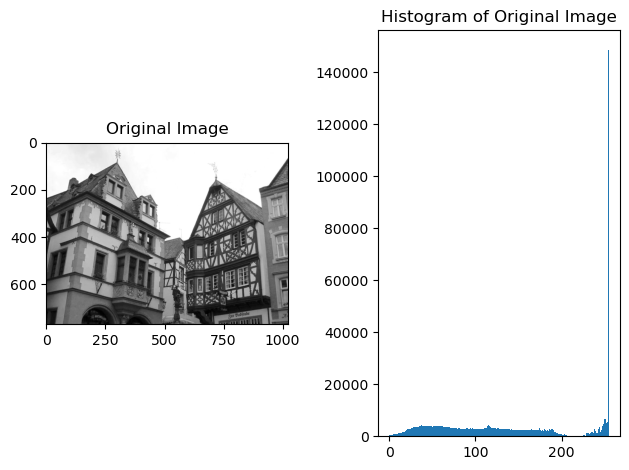

In [81]:
img = iio.imread('Image_processing_pre_otsus_algorithm.jpg')

fig, axs = plt.subplots(1, 2, tight_layout=True)

axs[0].imshow(img, cmap='gray')
axs[0].title.set_text("Original Image")
axs[1].hist(img.flatten(),bins=255)
axs[1].title.set_text("Histogram of Original Image")

display()

## Algorithm Formulation

### Background and foreground object probabilities
$\omega_0 = Pr(C_0) = \sum^t_{i=0} p_i = \omega_0(t)$ 

$\omega_1 = Pr(C_1) = \sum^L_{i=t+1} p_i = 1-\omega_0(t) = \omega_1(t)$

### Background and foreground object means to posterior probability (Bayes' Thm.)
$\mu_0 = \sum^t_{i=0} i Pr(i|C_0) = \sum^t_{i=0} i \frac{p_i}{\omega_0} = \frac{\mu_0(t)}{\omega_0(t)}$

$\mu_1 = \sum^L_{i=t+1} i Pr(i|C_1) = \sum^L_{i=t+1} i \frac{p_i}{\omega_1} = \frac{\mu_1(t)}{\omega_1(t)}$

### Mean of whole image
$\mu_T=\mu(L)=\sum^L_{i=0}ip_i$

### Relation
$\omega_0\mu_0 + \omega_1\mu_1 = \mu_T,\; \omega_0 + \omega_1 = 1$

### Class Variances
$Var[X] = E[X^2] = E[X]^2$

$\sigma_0^2= \sum^t_{i=0} (i-\mu_0)^2 Pr(i|C_0) = \sum^t_{i=0} (i - \mu_0)^2 \frac{p_i}{\omega_0}$

$\sigma_1^2= \sum^L_{i=t+1} (i-\mu_0)^2 Pr(i|C_1) = \sum^L_{i=t+1} (i - \mu_1)^2 \frac{p_i}{\omega_1}$

Minimization of intra-class variance defined as the sum of the variance of two classes.

Minimize: $\sigma_w^2 = w_0(t) \sigma_0^2(t) + w_1(t) \sigma_1^2(t)$

s.t. 